MC simulated samples of $\Lambda_c^{+}$ and $D^+$

In [112]:
import uproot
import numpy as np
import pandas as pd
import awkward as ak
import os

import matplotlib.pyplot as plt

In [274]:
dir_path = "/global/cfs/cdirs/atlas/gottino/Charm/Analysis/run_batch_gup/ntuples"

files = os.listdir(dir_path)
Dplus, LambdaC = ntuples

print(ntuples)

['CharmAnalysis.mc.ForcedDecay.Dplus.tree.root', 'CharmAnalysis.mc.ForcedDecay.LabmdaC.tree.root']


In [313]:
#processes ntunples given directory: returns trees 
def process_ntuple(ntuple):
    file = uproot.open(dir_path + "/" + ntuple)
    tree = file["CharmAnalysis;1"]
    return tree

#takes event #, list of branches, and batch size: returns tuple of branches with data
def show(event, TTree, branches, batch_size):
    #if we want the entire data set set batch size = 0
    if batch_size == 0:
        batch_size = TTree.num_entries

    #iterates through TTree as generator functiona and yields batches of data
    current_event = 0
    for array in TTree.iterate(branches, step_size = batch_size, library = "pd"):
        arrays = array[branches]
        if current_event == event:
            break
        current_event+=1
    return arrays


In [319]:
TTree = process_ntuple(ntuples[0])
TTree.name

'CharmAnalysis'

In [316]:
df = show(0, TTree, ["DMesons_pt", "DMesons_m", "DMesons_eta", "DMesons_phi"], 1000)

#drop empty rows
empty_indices = [i for i, x in enumerate(df['DMesons_pt']) if len(x) == 0]
df = df.drop(empty_indices)
df = df.reset_index(drop=True)
df

,DMesons_pt,DMesons_m,DMesons_eta,DMesons_phi
0,"[5735.74853515625, 5735.74853515625]","[1860.0809326171875, 2207.808349609375]","[0.9682132005691528, 0.9682132005691528]","[1.2285282611846924, 1.2285282611846924]"
1,[10047.125],[1862.4176025390625],[0.08182407170534134],[2.709681510925293]
2,"[18993.7421875, 18993.7421875]","[1853.90625, 2398.886962890625]","[-1.6619627475738525, -1.6619627475738525]","[-0.46051180362701416, -0.46051180362701416]"
3,"[10118.494140625, 10118.494140625]","[1874.203125, 2468.1806640625]","[0.041659336537122726, 0.041659336537122726]","[0.780849277973175, 0.780849277973175]"
4,"[12579.470703125, 12579.470703125]","[1884.987060546875, 2220.384521484375]","[-1.1025604009628296, -1.1025604009628296]","[0.7788794040679932, 0.7788794040679932]"
...,...,...,...,...
556,"[5451.50732421875, 5451.50732421875]","[1849.396240234375, 2459.749755859375]","[-0.064152292907238, -0.064152292907238]","[2.395824909210205, 2.395824909210205]"
557,"[30662.75, 30662.75, 30662.75]","[1872.678955078125, 2392.157470703125, 2270.92...","[1.7234350442886353, 1.7234350442886353, 1.723...","[-0.5089108347892761, -0.5089108347892761, -0...."
558,"[11592.576171875, 11592.576171875]","[1850.5804443359375, 2294.733642578125]","[-0.22858543694019318, -0.22858543694019318]","[0.2433209866285324, 0.2433209866285324]"
559,[9751.6259765625],[2263.62890625],[-0.15377356112003326],[-1.8734217882156372]


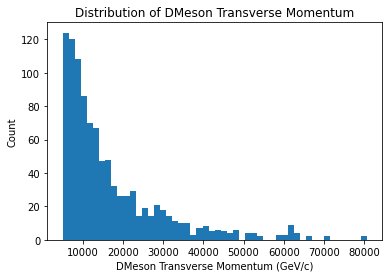

In [231]:
DMesons_pt = []
for pt in df['DMesons_pt']:
    DMesons_pt.extend(pt)

# Plot the histogram
plt.hist(DMesons_pt, bins=50)
plt.xlabel('DMeson Transverse Momentum (GeV/c)')
plt.ylabel('Count')
plt.title('Distribution of DMeson Transverse Momentum')
plt.show()

In [226]:
print(len(df["DMesons_pt"]))

1000
